In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("covid_data.csv")
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,852,852,852,852,852,852,852,853,853,853
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,86,88,91,92,96,113,118,130,138,140
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,26,26
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,21037,22020,22794,23620,24761,25987,27373,28764,30295,31577
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,11817,12364,13130,13325,13675,14103,14669,15281,16004,16667
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,107,108,108,108,108,108,108,108,108,108
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3110,3109,3112,3114,3117,3117,3115,3119,3128,3131


In [92]:
def read_and_preprocess(file_name, columns_to_drop, crucial_na_columns):
    df = pd.read_csv(file_name)
    df.dropna(subset = crucial_na_columns, inplace=True)
    df = df.drop(columns=columns_to_drop)
    return df

def extract_country_row(df, country_name):
    df.loc[df['Country/Region'] == country_name] = df.loc[df['Country/Region'] == country_name].fillna(0)
    return df.loc[df['Country/Region'] == country_name]

def plot_country_data(df, country_name, plot_line, plot_connections, starting_year, ending_year, removed_years):  
    y = np.array(extract_country_row(df, country_name).iloc[:, -(ending_year-starting_year+1):]).flatten()
    for i in range(len(y)):
        if y[i] != 0:
            break
    
    print(i)
    
    starting_year += i
    y = y[i:]
    x = np.array(range(starting_year, ending_year + 1))
    values_to_remove_from_x = []
    values_to_remove_from_y = []
    for i in range(len(x)):
        for j in range(len(removed_years)):
            if x[i] == removed_years[j]:
                values_to_remove_from_x.append(x[i])
                values_to_remove_from_y.append(y[i])
    x = [ele for ele in x if ele not in values_to_remove_from_x]
    y = [ele for ele in y if ele not in values_to_remove_from_y]

    
    
    
    m, b = np.polyfit(x, y, 1)
    if (plot_connections):
        plt.plot(x, y, marker=".",markersize=1)
    else:
        plt.plot(x, y, 'o')
    if plot_line:
        plt.plot(x, m*x + b)
        print(m)
        print(b)
    plt.title('# of COVID-19 cases in ' + country_name + ' vs Time')
    plt.xlabel('Time (days since 1/22/20)')
    plt.ylabel('# of COVID-19 cases in ' + country_name)
    
    plt.savefig('COVID' + country_name + 'data.png', bbox_inches='tight')
    
    
def find_country_to_minimize_column(df, column_name):
    return df[df["2017"] == df["2017"].min()]["Country Name"]


In [93]:
df = read_and_preprocess("covid_data.csv", ["Lat", "Long"], [])
df

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766
1,NaN,Albania,0,0,0,0,0,0,0,0,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,853,853,853
4,NaN,Angola,0,0,0,0,0,0,0,0,...,86,88,91,92,96,113,118,130,138,140
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,26,26
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,21037,22020,22794,23620,24761,25987,27373,28764,30295,31577
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,11817,12364,13130,13325,13675,14103,14669,15281,16004,16667
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,107,108,108,108,108,108,108,108,108,108
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,3110,3109,3112,3114,3117,3117,3115,3119,3128,3131


0


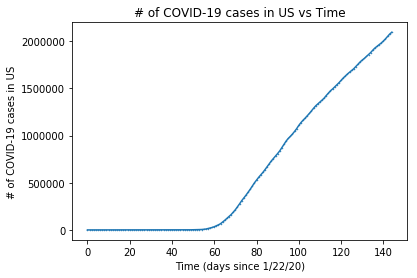

In [94]:
plot_country_data(df, "US", False, True, 0, 144, [])

8


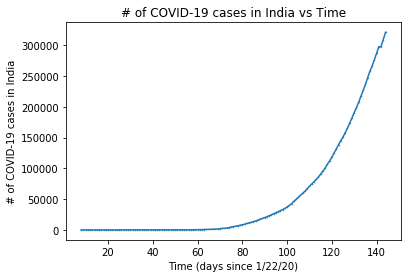

In [95]:
plot_country_data(df, "India", False, True, 0, 144, [])

9


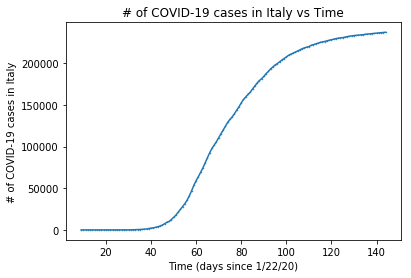

In [96]:
plot_country_data(df, "Italy", False, True, 0, 144, [])

51


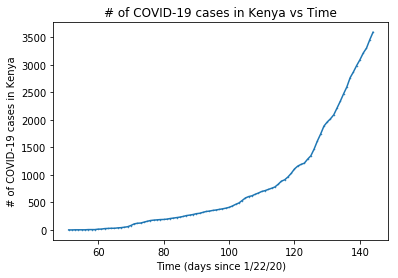

In [97]:
plot_country_data(df, "Kenya", False, True, 0, 144, [])

37


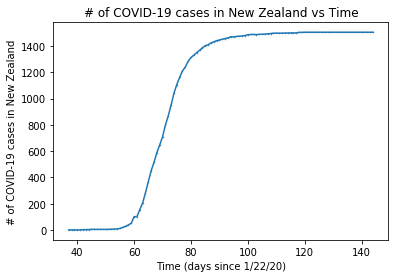

In [98]:
plot_country_data(df, "New Zealand", False, True, 0, 144, [])

0


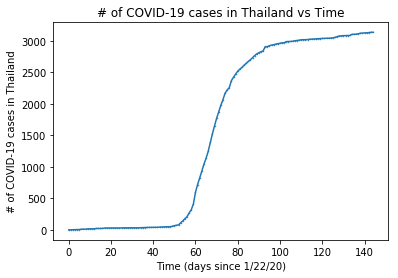

In [99]:
plot_country_data(df, "Thailand", False, True, 0, 144, [])

0


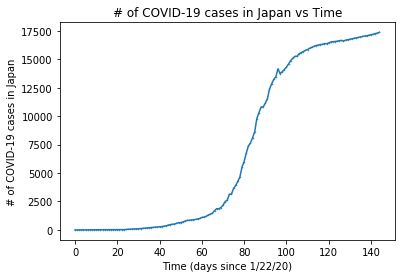

In [100]:
plot_country_data(df, "Japan", False, True, 0, 144, [])